# End-to-End Machine Learning Pipeline with ChatGPT: A Beginner's Guide

Welcome to the first notebook on building an end-to-end machine learning pipeline with ChatGPT!<br>
This notebook is the **first in a series** showing how to leverage the power of ChatGPT to build a **complete pipeline** without the need for extensive coding skills. If you want to continue with the series, [part 2](https://www.kaggle.com/code/jacoporepossi/how-to-use-chatgpt-in-a-competition-model-part-2) and [part 3](https://www.kaggle.com/code/jacoporepossi/how-to-use-chatgpt-in-a-competition-final-part-3) are also available.

You'll learn **how to use ChatGPT** to preprocess data, train models, and make predictions, all in an easy-to-follow and intuitive way. Whether you're a beginner or an experienced data scientist, this series will provide valuable insights and techniques that you can apply to your own projects.

So let's get started and discover how ChatGPT can help us building a machine learning pipeline!

But before starting, **why do we bother**?

# Introduction

During the 2021 Kaggle Survey Competition, [a colleague and I explored](https://www.kaggle.com/code/jacoporepossi/citizen-data-scientists-the-role-of-auto-ml-tools#Introduction) the broad concept of **AutoML and the impact on Data Scientists**. Particularly, we talked about **Citizen Data Scientists**, non-technical professional who works with data and have a basic understanding of data science concepts and tools. They typically come from business, finance, marketing, or other non-technical backgrounds, and often use data to make decisions or solve business problems.

With the arrival of ChatGPT, Citizen Data Scientists will have a new tool in their hands. By providing a user-friendly interface, ChatGPT can help them to **overcome the barriers** that often prevent them from using more advanced data science techniques, and empower them to make data-driven decisions and solve business problems with machine learning.<br>
However, even experienced Data Scientists could benefit from ChatGPT, mainly by quickly creating template code for rapid analysis/ML deployment.

I'm a strong believer of this quote I read on Internet:
> AI will not replace you. A person who's using AI will.

so that's why we should all bother and that's why I'll try to show you how we can leverage ChatGPT to create an end-to-end machine learning pipeline on this competition.

## What should I expect?

Some more, some less, each one of us has at least tried ChatGPT. I bet not many have tried to **make ChatGPT bend to their will**. By the end of these series I hope you'll learn: 
- how to properly interact and ask the right questions
- how to use ChatGPT to perform EDA, data clearning, modeling and optimization to improve model performance
- suggestions for further work and improvement

This series will be structured like the following:
- part 1, this notebook, will be devoted to **EDA and data cleaning**
- part 2 will be focused on **modelling**
- part 3 will be focused on **improving the performance and making a submission**

Let's get started!

# EDA with ChatGPT

Let's start by describing the problem to ChatGPT. The goal is quickly explore the dataset. What if we are not able to use `seaborn`?

Expand the accordion to see its response!

<details><summary><i><mark style='background-color:burlywood'>PROMPT</mark> - Provide python code to <b>analyze a tabular kaggle competition</b>. The dataset comes from the Employee Attrition Dataset, <b>the task is to classifier whether employees had attrition or not (binary classification).</b>
There are 35 available features, here's a list: [list of columns]
    
Write some <b>EDA code in seaborn to explore the dataset</b> </i></summary>
    
<img src="https://i.imgur.com/uDFresM.png">
</details>

I'll copy-paste the code generated and see the results. We'll adjust the path to the competition in order to correctly read the csv file.

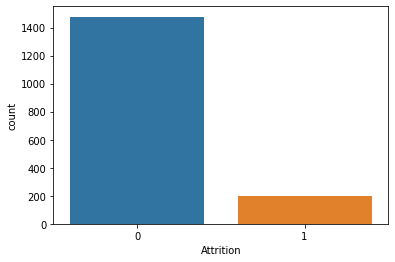

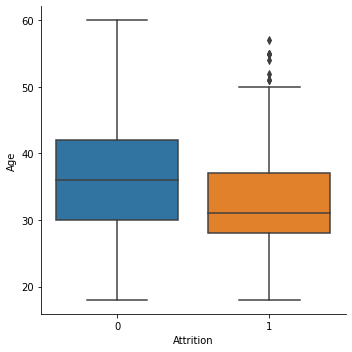

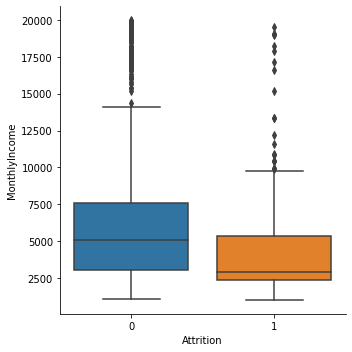

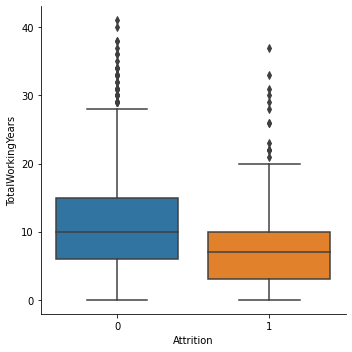

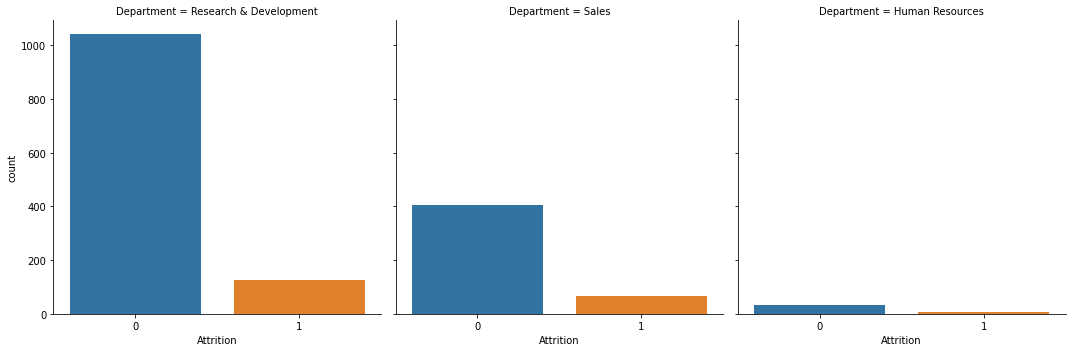

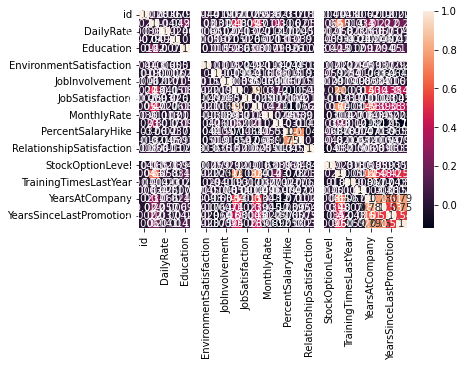

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/kaggle/input/playground-series-s3e3/train.csv")

# Explore the distribution of the target variable (attrition)
sns.countplot(x='Attrition', data=df)
plt.show()

# Explore the relationship between the target variable and a few key features
sns.catplot(x='Attrition', y='Age', kind='box', data=df)
sns.catplot(x='Attrition', y='MonthlyIncome', kind='box', data=df)
sns.catplot(x='Attrition', y='TotalWorkingYears', kind='box', data=df)
plt.show()

# Explore the relationship between the target variable and a categorical feature
sns.catplot(x='Attrition', col='Department', kind='count', data=df)
plt.show()

# Explore the correlation between all numerical features
corr = df.drop(columns=['Attrition']).corr()
sns.heatmap(corr, annot=True)
plt.show()


Not bad as a first start, but we can do way better for sure.

Let's improve the response of ChatGPT by providing a feedback to the model:

<details><summary><i><mark style='background-color:burlywood'>PROMPT</mark> - Rewrite the code generating <b>clearer visualizations: add title, legends, axis names and if possible, group the plots in subplots for a better understanding of the data.</b>
In the correlation plot, <b>show only the most correlated features</b> and increase the figure size and decrease the font size since I can't see anything</i></summary>
    <img src="https://i.imgur.com/CctIzDm.png">
</details>

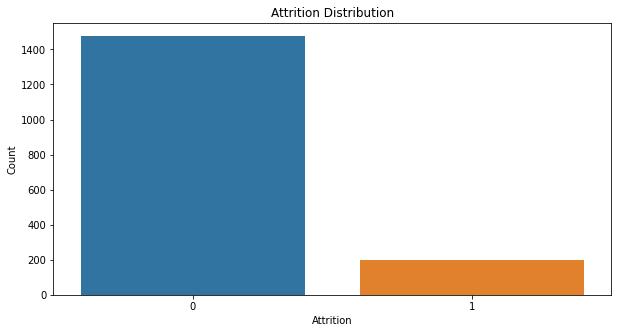

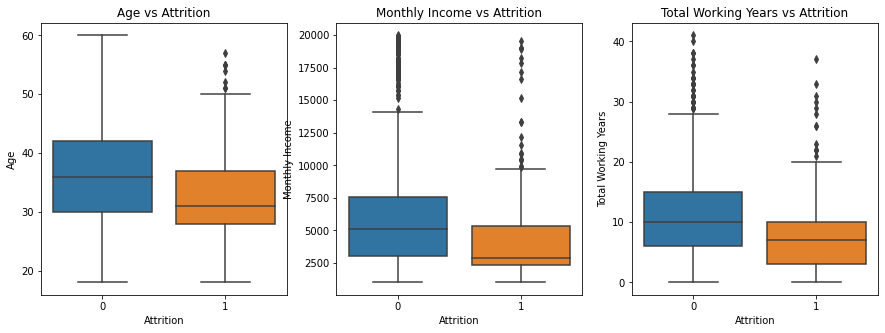

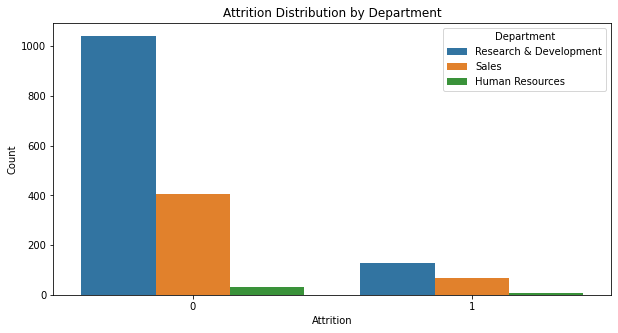

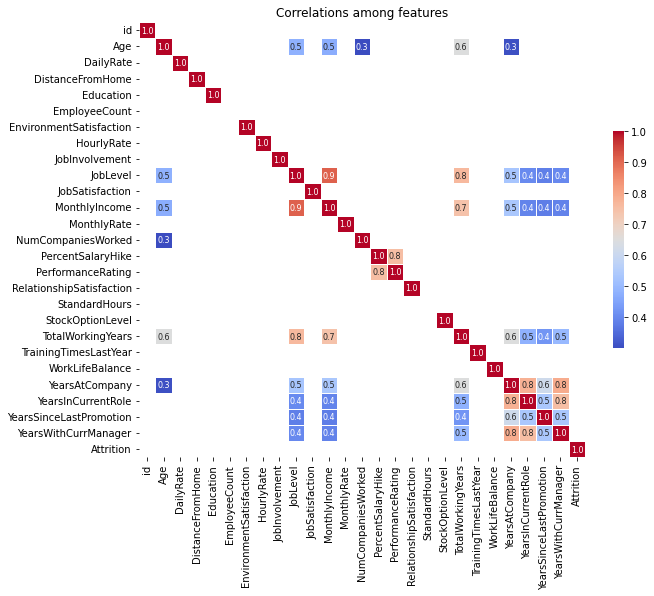

In [2]:
# Explore the distribution of the target variable (attrition)
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Attrition', data=df, ax=ax)
ax.set_title("Attrition Distribution")
ax.set_xlabel("Attrition")
ax.set_ylabel("Count")
plt.show()

# Explore the relationship between the target variable and a few key features
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x='Attrition', y='Age', data=df, ax=axs[0])
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axs[1])
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df, ax=axs[2])
axs[0].set_title("Age vs Attrition")
axs[0].set_xlabel("Attrition")
axs[0].set_ylabel("Age")
axs[1].set_title("Monthly Income vs Attrition")
axs[1].set_xlabel("Attrition")
axs[1].set_ylabel("Monthly Income")
axs[2].set_title("Total Working Years vs Attrition")
axs[2].set_xlabel("Attrition")
axs[2].set_ylabel("Total Working Years")
plt.show()

# Explore the relationship between the target variable and a categorical feature
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Attrition', hue='Department', data=df, ax=ax)
ax.set_title("Attrition Distribution by Department")
ax.set_xlabel("Attrition")
ax.set_ylabel("Count")
plt.show()

# Explore the correlation between all numerical features
corr = df.corr()

# Keep only correlation higher than a threshold
threshold = 0.3
corr_threshold = corr[(corr > threshold) | (corr < -threshold)]

#Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_threshold, annot=True, cmap='coolwarm', fmt=".1f",
            linewidths=.5, cbar_kws={'shrink': .5},annot_kws={'size': 8})
plt.title("Correlations among features")
plt.show()

Much better!

At this point, human input is needed since ChatGTP has no access to the data and is unable to explain the evidence from the plots and make decisions on next steps.

<div class="alert alert-block alert-info">
<b>Human EDA insights</b><br> 
<ul>
    <li> We are dealing with an <b>unbalanced and small dataset</b> </li>
    <li> Age, Income and Working years show <b>different distributions</b>, generally with higher averages in the <code>Attrition == 0</code> group</li>
    <li> We don't have differences in <b>Attrition per department</b></li>
    <li> We see some <b>correlations among features</b>, for instance TotalWorkingYears and JobLevel or YearsAtCompany and YearsInCurrentRole</li>
</ul>
</div>

Let's ask ChatGPT to generate more plots:

<details><summary><i><mark style='background-color:burlywood'>PROMPT</mark> - Add <b>more plots</b> exploring the correlated features emerged before. Keep the same concise and clear style as before. <b>Skip the plots you already showed before.</b></i></summary>
    <img src="https://i.imgur.com/EIUnXRb.png">
</details>

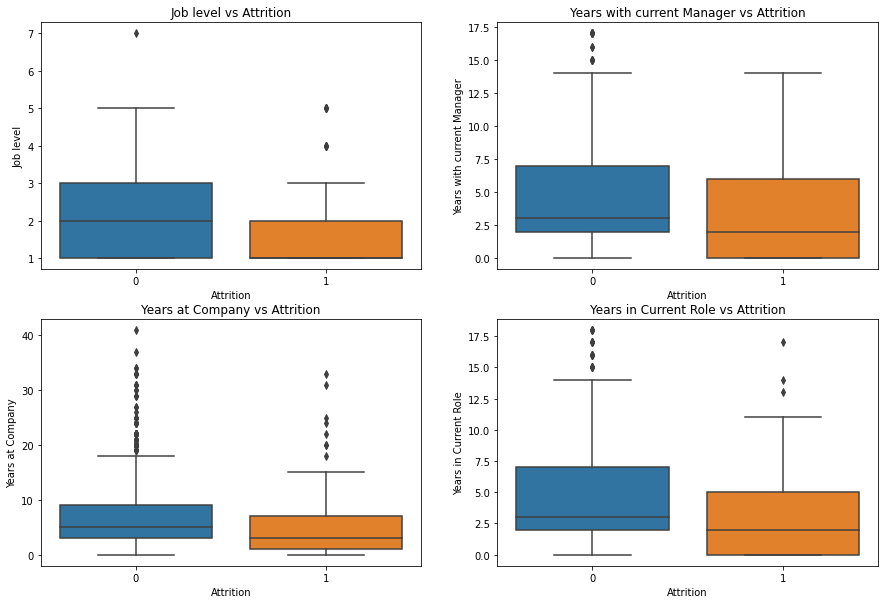

In [3]:
# Explore the relationship between the most correlated features and the target variable
fig, axs = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(x='Attrition', y='JobLevel', data=df, ax=axs[0, 0])
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, ax=axs[0, 1])
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, ax=axs[1, 0])
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=df, ax=axs[1, 1])

axs[0, 0].set_title("Job level vs Attrition")
axs[0, 0].set_xlabel("Attrition")
axs[0, 0].set_ylabel("Job level")

axs[0, 1].set_title("Years with current Manager vs Attrition")
axs[0, 1].set_xlabel("Attrition")
axs[0, 1].set_ylabel("Years with current Manager")

axs[1, 0].set_title("Years at Company vs Attrition")
axs[1, 0].set_xlabel("Attrition")
axs[1, 0].set_ylabel("Years at Company")

axs[1, 1].set_title("Years in Current Role vs Attrition")
axs[1, 1].set_xlabel("Attrition")
axs[1, 1].set_ylabel("Years in Current Role")
plt.show()

It's fascinating how ChatGPT chooses the most sensible features for the generated plots.

<div class="alert alert-block alert-info">
<b>Human EDA insights</b><br> 
<ul>
    <li> It is interesting to note that the <b>average number of years with the same manager is lower</b> for those who have shown Attrition: it looks like having the same manager helps reduce issues over time</li>
    <li> The <b>average years</b> in current role has an impact on Attrition: it looks like a person in a <b>new role shows Attrition more easily</b> than those who have been in the role for longer</li>
</ul>
</div>

# Data Cleaning
Now that we gathered more information about the dataset, we need to pre-process the raw data to ensure that it is in a format that can be used by a future machine learning model. This in general involves two aspects:
- Handling missing values and duplicates
- Handling outliers

Let's ask now if there are any missing values or duplicate rows:
<details><summary><i><mark style='background-color:burlywood'>PROMPT</mark> - Write a python code to check <b>missing values and duplicates</b> for the above dataset using pandas</i></summary>
    <img src="https://i.imgur.com/F8uNjCx.png">
</details>

In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:")
print(df.duplicated().sum())


Missing values:
id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion 

<div class="alert alert-block alert-info">
<b>Human EDA insights</b><br> 
<b>No missing values or duplicated records</b> are present, as in the previous playground episodes
</div>

<details><summary><i><mark style='background-color:burlywood'>PROMPT</mark> - Write a python code to highlight <b>outliers in the dataset and display some of them</b></i></summary>
    <img src="https://i.imgur.com/yNKiGWD.png">
</details>

In [5]:
# Identifying outliers using Z-score
z = abs(stats.zscore(df))
outliers = np.where(z > 3)

# Display the outliers
df.iloc[outliers[0], :]

# Visualize outliers using boxplot
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=df['Age'], ax=axs[0])
sns.boxplot(x=df['MonthlyIncome'], ax=axs[1])
sns.boxplot(x=df['TotalWorkingYears'], ax=axs[2])
axs[0].set_title("Age")
axs[1].set_title("Monthly Income")
axs[2].set_title("Total Working Years")
plt.show()


NameError: name 'stats' is not defined

Hey, ChatGPT, why is there an `NameError`?

<img src="https://i.imgur.com/uZ2ntVu.png">

Ok, we can still be friends...

In [6]:
from scipy import stats

# Identifying outliers using Z-score
z = abs(stats.zscore(df))
outliers = np.where(z > 3)

# Display the outliers
df.iloc[outliers[0], :]

# Visualize outliers using boxplot
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=df['Age'], ax=axs[0])
sns.boxplot(x=df['MonthlyIncome'], ax=axs[1])
sns.boxplot(x=df['TotalWorkingYears'], ax=axs[2])
axs[0].set_title("Age")
axs[1].set_title("Monthly Income")
axs[2].set_title("Total Working Years")
plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'int'

Maybe not!

For repeted errors, how can we handle this situation with ChatGPT? Most of the time we just need to report the line and the error we got:

<details><summary><i><mark style='background-color:burlywood'>PROMPT</mark> - at line <code>z = abs(stats.zscore(df))</code> I get <code>TypeError: unsupported operand type(s) for /: 'str' and 'int'</code></i></summary>
    <img src="https://i.imgur.com/JjRMXVX.png">
</details>

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
22,22,51,Travel_Rarely,1107,Human Resources,2,3,Human Resources,1,1,...,80,0,33,2,3,31,9,6,13,0
22,22,51,Travel_Rarely,1107,Human Resources,2,3,Human Resources,1,1,...,80,0,33,2,3,31,9,6,13,0
22,22,51,Travel_Rarely,1107,Human Resources,2,3,Human Resources,1,1,...,80,0,33,2,3,31,9,6,13,0
44,44,44,Travel_Rarely,796,Research & Development,10,4,Medical,1,2,...,80,0,16,4,3,16,9,13,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,1590,39,Travel_Frequently,1425,Sales,7,2,Life Sciences,1,2,...,80,1,22,3,3,21,6,11,17,0
1640,1640,53,Travel_Rarely,1462,Research & Development,1,4,Medical,1,3,...,80,1,34,3,1,33,8,12,7,0
1640,1640,53,Travel_Rarely,1462,Research & Development,1,4,Medical,1,3,...,80,1,34,3,1,33,8,12,7,0
1640,1640,53,Travel_Rarely,1462,Research & Development,1,4,Medical,1,3,...,80,1,34,3,1,33,8,12,7,0


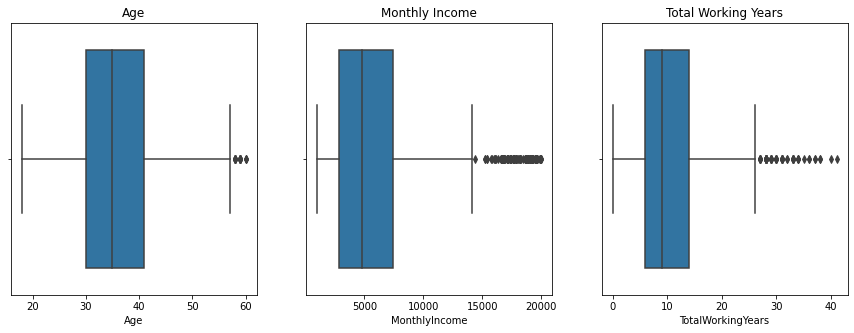

In [7]:
import numpy as np

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying outliers using Z-score
z = abs(stats.zscore(df[numerical_cols]))
outliers = np.where(z > 3)

# Display the outliers
display(df.iloc[outliers[0], :])

# Visualize outliers using boxplot
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=df['Age'], ax=axs[0])
sns.boxplot(x=df['MonthlyIncome'], ax=axs[1])
sns.boxplot(x=df['TotalWorkingYears'], ax=axs[2])
axs[0].set_title("Age")
axs[1].set_title("Monthly Income")
axs[2].set_title("Total Working Years")
plt.show()


Finally we are able to run the above code, which might come in handy in the future if we want to label those rows as "outliers" (a new feature for feature engineering?).

# Conclusions

This notebook has demonstrated how to use ChatGPT to perform EDA even **with zero to basics knowledge of Python and Pandas**. We saw **how to ask question** to the tool and **how to fine-tune some answers** to better fit our problem or correct errors.

This ends the **first part of this series**, in [part 2](https://www.kaggle.com/code/jacoporepossi/how-to-use-chatgpt-in-a-competition-model-part-2) we'll see how we can **create a machine learning model** to tackle the competition's task.

Stay tuned!